In [1]:
import cartopy.crs as ccrs
import gcsfs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
fs = gcsfs.GCSFileSystem()

In [3]:
fs.ls('gs://leap-persistent/kylemcevoy', refresh=True)

['leap-persistent/kylemcevoy/amip_prec_q90.zarr',
 'leap-persistent/kylemcevoy/cam6_pd_monthly_flut_ppe.zarr',
 'leap-persistent/kylemcevoy/cam6_pd_monthly_fsntoa_ppe.zarr',
 'leap-persistent/kylemcevoy/cam6_pd_ppe_prect.zarr',
 'leap-persistent/kylemcevoy/ceres_glob_mean.zarr',
 'leap-persistent/kylemcevoy/ceres_toa.zarr',
 'leap-persistent/kylemcevoy/cesm2_le50_prec_quantile090.nc',
 'leap-persistent/kylemcevoy/cesm2_le50_prec_quantile095.nc',
 'leap-persistent/kylemcevoy/cesm2_le_prec_quantile095.nc',
 'leap-persistent/kylemcevoy/cesm2_ppe_param_set.zarr',
 'leap-persistent/kylemcevoy/fsnt_ppe_glob_mean.zarr',
 'leap-persistent/kylemcevoy/prect_binned_ppe.zarr',
 'leap-persistent/kylemcevoy/satellite_climatologies_Nov2019.zarr',
 'leap-persistent/kylemcevoy/tropics_prect_target.zarr']

In [4]:
ceres_glob_mean_mapper = fs.get_mapper('gs://leap-persistent/kylemcevoy/ceres_glob_mean.zarr')

In [5]:
ceres_glob_mean = xr.open_dataset(ceres_glob_mean_mapper, engine='zarr')

In [6]:
ceres_glob_mean_ann = ceres_glob_mean.sel(time=slice('2001','2023')).groupby('time.year').mean()

In [7]:
ceres_glob_mean_ann

<xarray.Dataset> Size: 1kB
Dimensions:             (year: 23)
Coordinates:
  * year                (year) int64 184B 2001 2002 2003 2004 ... 2021 2022 2023
Data variables:
    gtoa_cre_lw_mon     (year) float32 92B 26.24 25.96 25.74 ... 25.16 25.03
    gtoa_cre_net_mon    (year) float32 92B -19.28 -19.82 ... -19.56 -19.06
    gtoa_cre_sw_mon     (year) float32 92B -45.52 -45.78 ... -44.72 -44.09
    gtoa_lw_all_mon     (year) float32 92B 240.0 240.4 240.5 ... 240.6 241.2
    gtoa_lw_clr_c_mon   (year) float32 92B 268.3 268.6 268.5 ... 268.0 268.5
    gtoa_lw_clr_t_mon   (year) float32 92B 266.2 266.4 266.3 ... 265.8 266.2
    gtoa_net_all_mon    (year) float32 92B 0.5431 0.1352 0.4863 ... 1.491 1.802
    gtoa_net_clr_c_mon  (year) float32 92B 18.19 18.25 18.15 ... 19.26 19.06
    gtoa_net_clr_t_mon  (year) float32 92B 19.82 19.96 19.87 ... 21.05 20.86
    gtoa_sw_all_mon     (year) float32 92B 99.81 99.77 99.18 ... 98.24 97.45
    gtoa_sw_clr_c_mon   (year) float32 92B 53.84 53.52 53.58 ... 53.11 52.92
    gtoa_sw_clr_t_mon   (year) float32 92B 54.29 53.98 54.06 ... 53.52 53.36
Attributes:
    Conventions:  CF-1.4
    DOI:          10.5067/TERRA-AQUA-NOAA20/CERES/EBAF_L3B004.2
    comment:      Climatology from 07/2005 to 06/2015
    institution:  NASA Langley Research Center
    title:        CERES EBAF TOA and Surface Fluxes. Monthly Averages and 07/...
    version:      Edition 4.2; Revised data Release Date January 2, 2024

In [8]:
ceres_glob_mean['gtoa_lw_all_mon']

<xarray.DataArray 'gtoa_lw_all_mon' (time: 276)> Size: 1kB
[276 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2kB 2001-01-15 2001-02-15 ... 2023-12-15
Attributes:
    CF_name:        toa_outgoing_longwave_flux
    comment:        none
    long_name:      Top of The Atmosphere Longwave Flux, All-Sky conditions, ...
    standard_name:  TOA Longwave Flux - All-Sky
    units:          W m-2
    valid_max:            400.000
    valid_min:            0.00000

In [8]:
ceres_good_slice = ceres_glob_mean_ann['gtoa_lw_all_mon'].sel(year=slice('2001', '2010'))
ceres_OLR_mean = ceres_good_slice.values.mean()

In [9]:
cam_flut_avg = xr.open_dataset('cam6_ppe_flut_avg.nc')

In [10]:
sat_mapper = fs.get_mapper('gs://leap-persistent/kylemcevoy/satellite_climatologies_Nov2019.zarr')
sat_data = xr.open_dataset(sat_mapper, engine='zarr')
sat_data

<xarray.Dataset> Size: 5MB
Dimensions:    (lat: 90, lev: 21, lon: 144)
Coordinates:
  * lat        (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lev        (lev) float32 84B 1e+03 925.0 850.0 700.0 ... 7.0 2.0 1.0 0.4
  * lon        (lon) float32 576B -178.8 -176.2 -173.8 ... 173.8 176.2 178.8
Data variables:
    lwcrf_toa  (lat, lon) float32 52kB ...
    olr        (lat, lon) float32 52kB ...
    pr         (lat, lon) float32 52kB ...
    pwv        (lat, lon) float32 52kB ...
    qv         (lev, lat, lon) float32 1MB ...
    qv_merra2  (lev, lat, lon) float32 1MB ...
    swabs_toa  (lat, lon) float32 52kB ...
    swcrf_toa  (lat, lon) float32 52kB ...
    t          (lev, lat, lon) float32 1MB ...
    t_merra2   (lev, lat, lon) float32 1MB ...
Attributes:
    Contact:             Greg Elsaesser: gregory.elsaesser@columbia.edu
    Conventions:         CF-1.6
    File_Creation_Date:  14 Nov 2019
    Institution:         Goddard Institute for Space Studies (GISS), NASA/Col...
    Source:              Global climatologies assembled by Greg Elsaesser (GI...
    Title:               Obs4MIPS, CERES-EBAF and NASA MEaSUREs serve as orig...

In [11]:
sat_data['pwv']

<xarray.DataArray 'pwv' (lat: 90, lon: 144)> Size: 52kB
[12960 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 576B -178.8 -176.2 -173.8 ... 173.8 176.2 178.8
Attributes:
    long_name:  Precipitable Water Vapor from Obs4MIPS archive (1988-2014 mul...
    units:      kg/m2

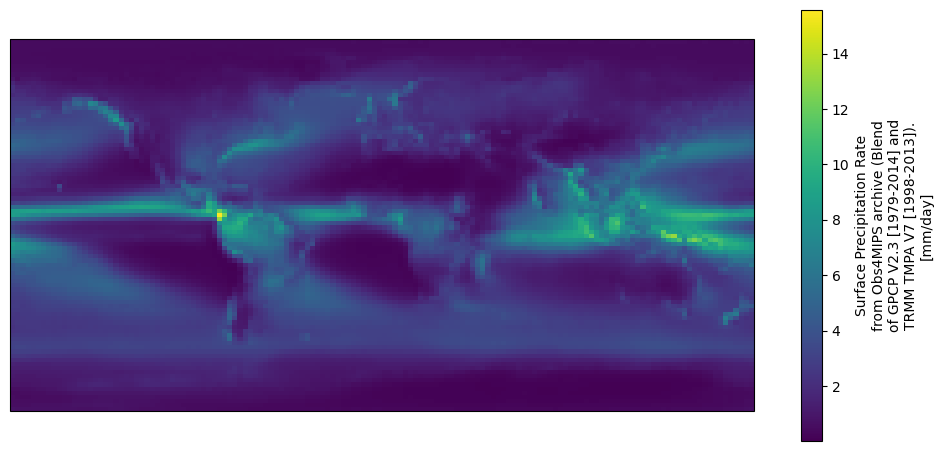

In [13]:
sat_data['pr'].plot(figsize = (12, 8),
                    subplot_kws={'projection': ccrs.PlateCarree()},
                   cbar_kwargs={'shrink': 0.7});

In [12]:
sat_cos_weights = np.cos(np.radians(sat_data['pr'].lat))
weighted_pr_data = sat_data['pr'].weighted(sat_cos_weights)
glob_mean_pr = weighted_pr_data.mean(dim=('lat','lon')).values.reshape(1)[0]
glob_mean_pr

2.859904

In [13]:
prec_mapper = fs.get_mapper("gs://leap-persistent/yiqioyang/cam6_PD_monthly_prec.zarr")
prec_xr = xr.open_dataset(prec_mapper, engine = 'zarr')

In [14]:
prec_xr = prec_xr.chunk({'lat': 64, 'lon': 48})

In [15]:
prect_xr = prec_xr['PRECC'] + prec_xr['PRECL']
prect_mean = prect_xr.mean('time')

In [16]:
prect_mean = prect_mean.compute()

In [17]:
prect_mean = prect_mean * 86400 * 1000

In [18]:
prect_mean

<xarray.DataArray (ensemble: 262, lat: 192, lon: 288)> Size: 116MB
array([[[0.22746601, 0.22746601, 0.22746596, ..., 0.22746601,
         0.22746601, 0.22746601],
        [0.19709788, 0.19652746, 0.19604894, ..., 0.19893442,
         0.19831568, 0.19771835],
        [0.15073499, 0.14921682, 0.14787693, ..., 0.15540675,
         0.1538675 , 0.15231635],
        ...,
        [0.74839557, 0.75018704, 0.75196123, ..., 0.7415729 ,
         0.74379701, 0.74595183],
        [0.72819904, 0.73050381, 0.73224931, ..., 0.7220265 ,
         0.72433318, 0.72628265],
        [0.63130852, 0.63134202, 0.63136631, ..., 0.63134563,
         0.63134121, 0.63133929]],

       [[0.22839066, 0.22839018, 0.22839022, ..., 0.2283896 ,
         0.22838964, 0.22839066],
        [0.22248305, 0.22204478, 0.22181099, ..., 0.22337074,
         0.22320056, 0.22301613],
        [0.16379558, 0.16225787, 0.1608697 , ..., 0.16799355,
         0.16680533, 0.16539082],
...
        [0.64148046, 0.64338215, 0.64508414, ..., 0.63510551,
         0.63840995, 0.64149765],
        [0.63457897, 0.6373157 , 0.63957699, ..., 0.63372468,
         0.63410687, 0.63496055],
        [0.57401739, 0.57407982, 0.57412007, ..., 0.57403404,
         0.57403151, 0.57402925]],

       [[0.24940652, 0.24940654, 0.24940654, ..., 0.24940652,
         0.24940652, 0.24940652],
        [0.22336846, 0.22258665, 0.22178118, ..., 0.22555375,
         0.22483298, 0.22410078],
        [0.17667664, 0.17492003, 0.17321709, ..., 0.1818568 ,
         0.18015159, 0.17844232],
        ...,
        [0.77487907, 0.77452868, 0.77318752, ..., 0.77518241,
         0.77496831, 0.77532361],
        [0.72575837, 0.72619448, 0.72586596, ..., 0.72635148,
         0.72602742, 0.72606556],
        [0.64343495, 0.64345582, 0.64352861, ..., 0.64345007,
         0.64344953, 0.64345014]]])
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8

In [19]:
prect_weights = np.cos(np.radians(prect_mean['lat']))
prect_weighted = prect_mean.weighted(prect_weights)
prect_glob_mean = prect_weighted.mean(dim=('lat', 'lon'))

In [20]:
prect_glob_mean

<xarray.DataArray (ensemble: 262)> Size: 2kB
array([2.89737298, 2.67794614, 2.70626887, 2.88967941, 2.85697518,
       2.49745628, 2.50621414, 2.34205022, 3.03516483, 2.53931425,
       2.54542102, 2.62345538, 2.92532351, 2.7864237 , 2.79255505,
       2.92238705, 2.89264375, 2.8171375 , 2.97158411, 2.95009596,
       2.80765916, 2.60696547, 3.00600443, 2.83610701, 3.0648    ,
       2.74278955, 2.41661496, 2.77945776, 3.13300764, 2.74302293,
       2.70919859, 2.66329392, 2.79552118, 3.1110579 , 2.80501231,
       2.47292655, 2.69977894, 2.76451414, 1.90638653, 2.79983737,
       3.03568963, 2.67573608, 2.98500683, 2.66950612, 2.96480874,
       2.790877  , 2.99616192, 2.98422893, 2.77447828, 2.67577202,
       2.85663347, 2.92638319, 2.85660593, 2.97089027, 2.8001795 ,
       2.57132311, 2.68058382, 2.81749207, 2.88770084, 2.6455857 ,
       2.8444392 , 2.52808635, 2.48712901, 2.70332356, 2.7303905 ,
       2.96878844, 2.89972285, 2.63687329, 3.07008088, 2.78655274,
       2.85787777, 2.80947927, 2.5315075 , 2.73903631, 2.3720357 ,
       2.83065496, 2.92081987, 2.68935216, 2.85427919, 3.08132108,
       2.7131202 , 2.78409125, 2.59608813, 2.74236648, 2.46126926,
       2.60020984, 2.56809144, 2.84405869, 2.64803343, 2.70031792,
       2.81728822, 2.84141356, 2.62649373, 2.25602432, 2.7511929 ,
       2.75794792, 2.57515886, 2.82613858, 2.67601626, 2.85261245,
...
       2.86820966, 2.5722451 , 2.91507467, 2.85831362, 2.63515657,
       2.81727333, 2.7478841 , 2.84089375, 2.73145309, 3.0398927 ,
       2.8534441 , 2.81442343, 2.72622999, 2.90979536, 2.97257183,
       2.82961928, 2.75722318, 2.91392493, 3.08501383, 3.26375231,
       2.96886167, 2.60916805, 2.88369036, 3.01765041, 2.64703927,
       2.70136959, 2.85727957, 2.81258889, 2.77704687, 2.7451293 ,
       2.89022608, 2.94368209, 2.85091227, 2.9295516 , 2.66583678,
       2.74057576, 2.81201646, 3.01054179, 2.7353091 , 2.85644816,
       2.84259845, 2.79815831, 2.81725943, 2.65252858, 2.82058921,
       2.73719944, 2.48473274, 2.91130378, 2.61855223, 2.80796291,
       2.70863424, 2.84937653, 2.55489952, 2.66699285, 2.89307612,
       2.78321551, 2.82018528, 2.48461683, 2.72535795, 2.60430652,
       2.81114423, 2.72158053, 2.85310015, 2.48556585, 2.72168948,
       2.81581859, 2.76336081, 2.74070732, 2.98267377, 2.71670967,
       3.08594607, 3.07402561, 2.49111754, 2.40425814, 2.80461933,
       2.90266683, 2.81860266, 2.78032173, 2.79671626, 2.88430258,
       2.769804  , 2.83307627, 2.78967331, 3.02635064, 2.70175331,
       2.86193488, 2.86588753, 2.83937608, 2.58319221, 2.62138282,
       2.695387  , 2.87334449, 2.97430891, 2.68746389, 2.8974745 ,
       2.63973681, 2.77112028])
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262

In [21]:
ensemble_mems = np.delete(np.arange(263), 175)

In [22]:
pr_cesm2_gap = np.abs(prect_glob_mean.sel(ensemble=0).values - glob_mean_pr)
pr_cesm2_gap

0.037468929655102734

In [23]:
pr_good_indx = np.where((prect_glob_mean.values <= glob_mean_pr + pr_cesm2_gap) &
                        (prect_glob_mean.values >= glob_mean_pr - pr_cesm2_gap))
pr_good_indx

(array([  0,   3,   4,  16,  23,  50,  52,  58,  60,  70,  75,  78,  87,
         91,  97,  99, 101, 103, 108, 110, 112, 115, 118, 122, 123, 124,
        125, 129, 131, 135, 138, 146, 157, 165, 168, 172, 175, 180, 187,
        191, 195, 197, 204, 205, 216, 219, 227, 244, 246, 250, 251, 252,
        256]),)

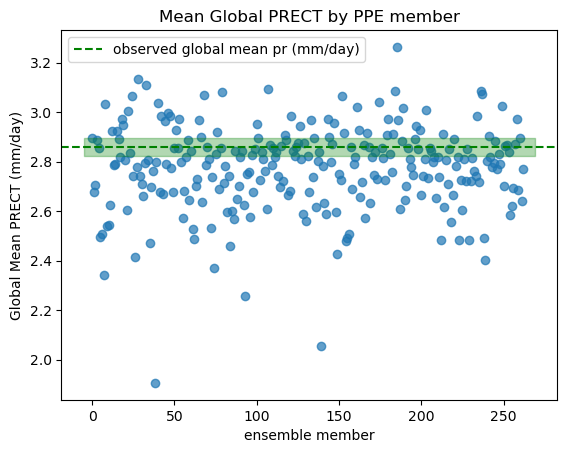

In [25]:
plt.scatter(ensemble_mems, prect_glob_mean.values, alpha = 0.7)
plt.axhline(glob_mean_pr, linestyle='--', color='green', zorder = 2.5, label='observed global mean pr (mm/day)')
plt.fill_between(np.arange(-5, 270), glob_mean_pr - pr_cesm2_gap, glob_mean_pr + pr_cesm2_gap, color='green', alpha = 0.3)
plt.xlabel('ensemble member')
plt.ylabel('Global Mean PRECT (mm/day)')
plt.title('Mean Global PRECT by PPE member')
plt.legend()
plt.savefig('ppe_prect_vs_glob_mean_pr2.png');

In [26]:
np.count_nonzero((prect_glob_mean.values <= glob_mean_pr + pr_cesm2_gap) &
                 (prect_glob_mean.values >= glob_mean_pr - pr_cesm2_gap))

53

In [27]:
glob_mean_pr

2.859904

In [28]:
prect_glob_mean.sel(ensemble=0).values.reshape((1))

array([2.89737298])

In [29]:
cam_flut_avg['FLUT'].values[0]

237.68972155470985

In [30]:
ceres_OLR_mean - cam_flut_avg['FLUT'].values[0]

2.547262698219839

In [27]:
ceres_cesm2_gap = ceres_OLR_mean - cam_flut_avg['FLUT'].values[0]

In [32]:
np.count_nonzero((cam_flut_avg['FLUT'] >= ceres_OLR_mean - ceres_cesm2_gap) &
                 (cam_flut_avg['FLUT'] <= ceres_OLR_mean + ceres_cesm2_gap))

101

In [33]:
flut_good_indx = np.where((cam_flut_avg['FLUT'] >= ceres_OLR_mean - ceres_cesm2_gap) &
                          (cam_flut_avg['FLUT'] <= ceres_OLR_mean + ceres_cesm2_gap))

In [34]:
flut_good_indx

(array([  0,   8,   9,  12,  13,  14,  17,  20,  23,  25,  27,  28,  32,
         33,  36,  39,  40,  45,  47,  49,  51,  53,  58,  64,  69,  70,
         71,  76,  78,  81,  83,  86,  87,  88,  92,  98, 103, 104, 109,
        112, 114, 115, 119, 121, 123, 124, 125, 126, 127, 129, 131, 133,
        134, 135, 138, 143, 147, 150, 151, 153, 159, 160, 165, 172, 175,
        176, 177, 180, 183, 184, 185, 186, 191, 193, 196, 197, 198, 199,
        203, 206, 210, 212, 214, 215, 216, 219, 220, 227, 229, 233, 236,
        239, 242, 243, 249, 251, 252, 254, 256, 257, 258]),)

In [35]:
good_flut_pr = np.intersect1d(flut_good_indx, pr_good_indx)

In [36]:
np.shape(np.intersect1d(flut_good_indx, pr_good_indx))[0]

28

In [24]:
fsnt_mapper = fs.get_mapper('gs://leap-persistent/kylemcevoy/fsnt_ppe_glob_mean.zarr')

In [25]:
fsnt_glob_mean = xr.open_dataset(fsnt_mapper, engine='zarr')

In [26]:
ceres_glob_mean_ann['gtoa_sw_all_mon']

<xarray.DataArray 'gtoa_sw_all_mon' (year: 23)> Size: 92B
array([99.808754, 99.76511 , 99.184784, 99.34861 , 99.31344 , 99.20031 ,
       99.34464 , 99.07241 , 99.158516, 99.648865, 99.35137 , 98.93252 ,
       99.40732 , 99.09428 , 98.63914 , 98.48825 , 98.467674, 98.52222 ,
       97.990105, 98.411156, 98.32568 , 98.23875 , 97.45266 ],
      dtype=float32)
Coordinates:
  * year     (year) int64 184B 2001 2002 2003 2004 2005 ... 2020 2021 2022 2023
Attributes:
    CF_name:        toa_outgoing_shortwave_flux
    comment:        none
    long_name:      Top of The Atmosphere Shortwave Flux, All-Sky conditions,...
    standard_name:  TOA Shortwave Flux - All-Sky
    units:          W m-2
    valid_max:            600.000
    valid_min:            0.00000

In [40]:
fsnt_glob_mean

<xarray.Dataset> Size: 4kB
Dimensions:   (ensemble: 262)
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262
Data variables:
    FSNT      (ensemble) float64 2kB ...

In [41]:
ceres_glob_mean

<xarray.Dataset> Size: 15kB
Dimensions:             (time: 276)
Coordinates:
  * time                (time) datetime64[ns] 2kB 2001-01-15 ... 2023-12-15
Data variables:
    gtoa_cre_lw_mon     (time) float32 1kB ...
    gtoa_cre_net_mon    (time) float32 1kB ...
    gtoa_cre_sw_mon     (time) float32 1kB ...
    gtoa_lw_all_mon     (time) float32 1kB ...
    gtoa_lw_clr_c_mon   (time) float32 1kB ...
    gtoa_lw_clr_t_mon   (time) float32 1kB ...
    gtoa_net_all_mon    (time) float32 1kB ...
    gtoa_net_clr_c_mon  (time) float32 1kB ...
    gtoa_net_clr_t_mon  (time) float32 1kB ...
    gtoa_sw_all_mon     (time) float32 1kB ...
    gtoa_sw_clr_c_mon   (time) float32 1kB ...
    gtoa_sw_clr_t_mon   (time) float32 1kB ...
Attributes:
    Conventions:  CF-1.4
    DOI:          10.5067/TERRA-AQUA-NOAA20/CERES/EBAF_L3B004.2
    comment:      Climatology from 07/2005 to 06/2015
    institution:  NASA Langley Research Center
    title:        CERES EBAF TOA and Surface Fluxes. Monthly Averages and 07/...
    version:      Edition 4.2; Revised data Release Date January 2, 2024

In [43]:
ceres_glob_mean_ann['gtoa_net_all_mon']

<xarray.DataArray 'gtoa_net_all_mon' (year: 23)> Size: 92B
array([0.54314166, 0.13521671, 0.48634985, 0.6952164 , 0.4151    ,
       0.8129415 , 0.19593336, 1.1982751 , 0.90266687, 0.02122521,
       0.72567505, 1.3831335 , 0.58678335, 0.8561585 , 1.0915748 ,
       0.9469084 , 0.9466168 , 1.36585   , 1.3514419 , 0.73359174,
       1.5108916 , 1.4905251 , 1.8018502 ], dtype=float32)
Coordinates:
  * year     (year) int64 184B 2001 2002 2003 2004 2005 ... 2020 2021 2022 2023
Attributes:
    CF_name:        toa_net_downward_flux
    comment:        none
    long_name:      Top of The Atmosphere Net Flux, All-Sky conditions, Month...
    standard_name:  TOA Net Flux - All-Sky
    units:          W m-2
    valid_max:            400.000
    valid_min:           -400.000

In [45]:
net_flux = fsnt_glob_mean['FSNT'].values - cam_flut_avg['FLUT'].values

In [46]:
ceres_net_toa_mean = ceres_glob_mean_ann['gtoa_net_all_mon'].sel(year=slice('2001', '2010')).values.mean()

In [47]:
ceres_cesm2_net_flux_gap = np.abs(net_flux[0] - ceres_net_toa_mean)

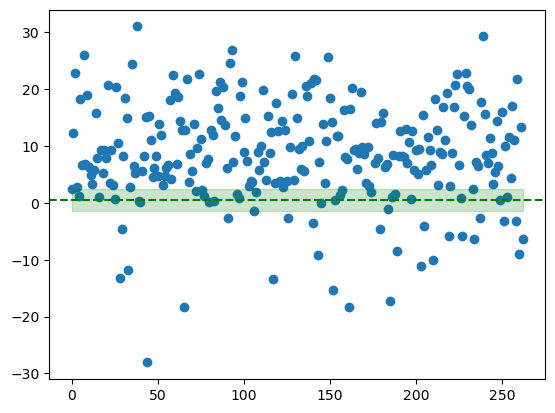

In [59]:
plt.scatter(ensemble_mems, net_flux)
plt.axhline(ceres_net_toa_mean, linestyle='--', color='green')
plt.fill_between(ensemble_mems, ceres_net_toa_mean - ceres_cesm2_net_flux_gap,
                ceres_net_toa_mean + ceres_cesm2_net_flux_gap,
                alpha = 0.2,
                color = 'green');

In [48]:
good_flux_indx = np.where((net_flux >= ceres_net_toa_mean - ceres_cesm2_net_flux_gap) &
                          (net_flux <= ceres_net_toa_mean + ceres_cesm2_net_flux_gap))

In [49]:
np.intersect1d(good_flux_indx, good_flut_pr)

array([  0, 252])

In [ ]:
2 + 3

In [50]:
sat_data['pwv']

<xarray.DataArray 'pwv' (lat: 90, lon: 144)> Size: 52kB
[12960 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 576B -178.8 -176.2 -173.8 ... 173.8 176.2 178.8
Attributes:
    long_name:  Precipitable Water Vapor from Obs4MIPS archive (1988-2014 mul...
    units:      kg/m2

In [51]:
tmq_glob_mean = xr.open_dataset('tmq_glob_mean.nc')

In [52]:
tmq_glob_mean_np = tmq_glob_mean['TMQ'].values

In [53]:
sat_pwv_weighted = sat_data['pwv'].weighted(np.cos(np.radians(sat_data['pwv'].lat)))

In [54]:
sat_pwv_glob_mean = sat_pwv_weighted.mean(dim=('lat', 'lon'))

In [55]:
tmq_glob_mean_np[0]

24.81673354250628

In [56]:
pwv_cesm2_gap = np.abs(tmq_glob_mean_np[0] - sat_pwv_glob_mean)

In [57]:
pwv_cesm2_gap.values

array(0.12345773)

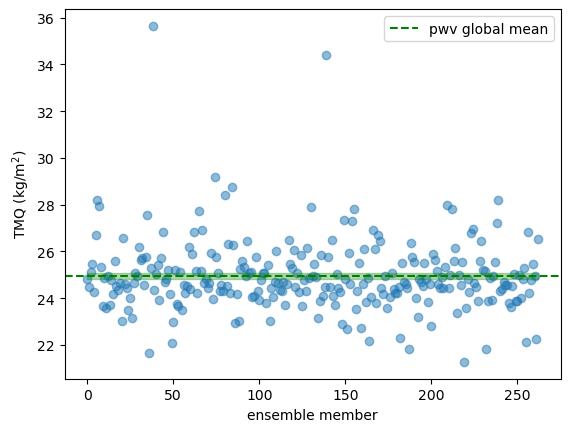

In [154]:
plt.scatter(ensemble_mems, tmq_glob_mean_np, alpha=0.5)
plt.axhline(sat_pwv_glob_mean,
            linestyle='--',
            color='green',
            zorder=2.5,
           label='pwv global mean')
plt.fill_between(ensemble_mems,
                 sat_pwv_glob_mean - pwv_cesm2_gap,
                 sat_pwv_glob_mean + pwv_cesm2_gap,
                 color='green',
                 alpha=0.3)
plt.xlabel('ensemble member')
plt.ylabel(r'TMQ $(\mathrm{kg}/\mathrm{m}^2)$')
plt.legend()
plt.savefig('TMQ_ppe_plot.png');

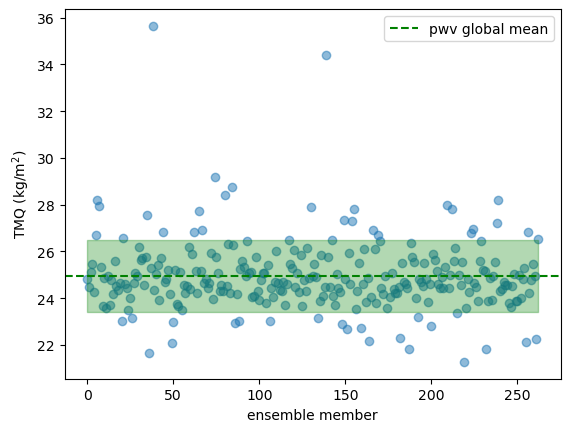

In [179]:
plt.scatter(ensemble_mems, tmq_glob_mean_np, alpha=0.5)
plt.axhline(sat_pwv_glob_mean,
            linestyle='--',
            color='green',
            zorder=2.5,
           label='pwv global mean')
plt.fill_between(ensemble_mems,
                 sat_pwv_glob_mean - tmq_sd,
                 sat_pwv_glob_mean + tmq_sd,
                 color='green',
                 alpha=0.3)
plt.xlabel('ensemble member')
plt.ylabel(r'TMQ $(\mathrm{kg}/\mathrm{m}^2)$')
plt.legend()
plt.savefig('TMQ_ppe_plot_sd.png');

In [76]:
(sat_pwv_glob_mean.values - pwv_cesm2_gap.values)

24.81673354250628

In [58]:
pwv_good_indx = np.where((tmq_glob_mean_np >= (sat_pwv_glob_mean.values - pwv_cesm2_gap.values)) & 
                         (tmq_glob_mean_np <= (sat_pwv_glob_mean.values + pwv_cesm2_gap.values)))

In [59]:
np.count_nonzero((tmq_glob_mean_np >= (sat_pwv_glob_mean.values - pwv_cesm2_gap.values)) & 
                         (tmq_glob_mean_np <= (sat_pwv_glob_mean.values + pwv_cesm2_gap.values)))

24

In [113]:
pwv_good_indx

(array([  0,  10,  12,  29,  40,  46,  69,  92, 122, 129, 131, 133, 145,
        163, 173, 205, 210, 215, 233, 235, 247, 250, 252, 259]),)

In [125]:
np.intersect1d(pwv_good_indx, good_flut_pr)

array([  0, 129, 131, 252])

In [129]:
pwv_good_indx2 = np.where((tmq_glob_mean_np >= sat_pwv_glob_mean.values - 0.5) &
                          (tmq_glob_mean_np <= sat_pwv_glob_mean.values + 0.5))

In [127]:
np.intersect1d(pwv_good_indx2, good_flut_pr)

array([  0,  23,  58,  70,  78,  87, 103, 112, 123, 124, 129, 131, 138,
       165, 172, 175, 180, 216, 227, 251, 252, 256])

In [130]:
np.intersect1d(pwv_good_indx2, good_flut_pr).shape

(10,)

In [1]:
sat_data['pwv']

NameError: name 'sat_data' is not defined

In [62]:
cre_mapper = fs.get_mapper('gs://leap-persistent/yiqioyang/cam6_PD_monthly_lwsw.zarr')

In [63]:
lwsw_xr = xr.open_dataset(cre_mapper, engine='zarr').chunk({'ensemble': 15})

In [64]:
lw_mean = lwsw_xr['LWCF'].mean('time')
sw_mean = lwsw_xr['SWCF'].mean('time')

In [65]:
lw_weights = np.cos(np.radians(lw_mean.lat))
sw_weights = np.cos(np.radians(sw_mean.lat))
lw_weighted = lw_mean.weighted(lw_weights)
sw_weighted = sw_mean.weighted(sw_weights)

In [66]:
lw_glob_mean = lw_weighted.mean(dim=('lat', 'lon'))
sw_glob_mean = sw_weighted.mean(dim=('lat', 'lon'))

In [67]:
lw_glob_mean.to_netcdf('lw_glob_mean.nc')

In [25]:
sw_glob_mean.to_netcdf('sw_glob_mean.nc')

In [26]:
lw_glob_mean.compute()

<xarray.DataArray 'LWCF' (ensemble: 262)> Size: 2kB
array([24.00597219, 24.06075456, 19.92389547, 25.37621167, 24.35046154,
       34.4672396 , 40.03714148, 39.98170911, 23.20505979, 23.56705648,
       33.95658004, 24.30103641, 18.7455054 , 19.71880519, 21.07856207,
       19.16694836, 25.91684419, 20.48895934, 16.45513148, 19.09292874,
       21.857356  , 30.18937404, 19.18662222, 21.22385938, 14.41189267,
       23.05684738, 31.55150561, 19.65777592, 21.93562995, 26.9409292 ,
       31.15013876, 28.55690894, 20.41600061, 20.07131835, 30.03248904,
       31.57257232, 21.51109427, 31.24091166, 56.19796453, 20.34356788,
       19.13944991, 29.32134976, 17.25818503, 27.41317861, 27.61010064,
       22.03232868, 19.01320534, 21.68557471, 24.30657968, 23.11540351,
       23.96297407, 19.81955148, 18.19246951, 19.67699846, 27.64226179,
       27.25226321, 29.1790546 , 18.99189789, 19.74600199, 24.457343  ,
       14.90170429, 36.98177803, 35.72816794, 24.30215626, 22.89068397,
       31.49999472, 18.57665958, 27.28449986, 18.34582196, 21.35745959,
       21.32179386, 19.67239702, 35.12842675, 19.00952997, 40.94491081,
       26.94261493, 21.93024026, 31.00348484, 22.44155757, 18.90842432,
       35.82121341, 22.01675189, 30.4069168 , 22.31163014, 34.78280699,
       28.30364456, 22.0813546 , 19.76539995, 20.44663223, 26.60445524,
       25.85682874, 31.10123215, 20.3169541 , 37.92503805, 27.60957473,
       25.29224895, 28.50289417, 23.37383715, 23.05348578, 13.40590199,
...
       22.87426192, 35.27942013, 25.060716  , 12.75444874, 34.28177119,
       33.69821773, 25.08663737, 23.72521463, 25.89013219, 18.13358911,
       21.76566782, 20.68861759, 21.37778902, 23.31820542, 15.94663553,
       20.15041673, 18.20763282, 26.10771541, 21.20431965, 20.07342183,
       21.94686324, 22.25637718, 32.59373265, 25.47877043, 30.34975708,
       24.1541999 , 22.61054887, 23.71530994, 20.64545748, 24.97102228,
       25.11053964, 21.68157433, 19.09385586, 19.54102525, 21.50627843,
       26.61002684, 23.97974464, 24.25105354, 21.71619304, 25.91181381,
       24.82625988, 19.29280753, 24.82380722, 38.24087819, 25.77081615,
       19.23508259, 33.61513269, 23.20592163, 34.58776586, 19.94969556,
       18.63601435, 18.89235661, 29.11525479, 29.94935258, 21.52095559,
       23.20251264, 16.50702948, 33.67564929, 27.76604472, 32.46458567,
       23.68514261, 27.92488866, 24.12392446, 31.14683692, 20.62648601,
       18.44582901, 16.51462033, 24.78164503, 20.05857872, 23.38125466,
       17.57341911, 21.86824976, 37.39505836, 35.51439929, 20.19886119,
       18.95211989, 24.62104004, 20.0406252 , 21.64206223, 23.86619753,
       24.47318441, 16.73294075, 24.5821043 , 19.59244047, 20.30297406,
       29.48604487, 18.79535468, 21.24769725, 28.90453907, 23.47399907,
       32.07838018, 20.14676541, 20.9507339 , 23.75462121, 26.47845599,
       18.34010032, 36.82582466])
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262

In [68]:
lw_glob_mean = xr.open_dataset('lw_glob_mean.nc')['LWCF'].values
sw_glob_mean = xr.open_dataset('sw_glob_mean.nc')['SWCF'].values

In [69]:
cre_lw_mean = ceres_glob_mean_ann['gtoa_cre_lw_mon'].sel(year=slice('2001','2010')).values.mean()
cre_sw_mean = ceres_glob_mean_ann['gtoa_cre_sw_mon'].sel(year=slice('2001','2010')).values.mean()

In [70]:
cre_lw_median = np.median(ceres_glob_mean_ann['gtoa_cre_lw_mon'].sel(year=slice('2001','2010')).values)

In [67]:
lw_glob_mean

array([24.00597219, 24.06075456, 19.92389547, 25.37621167, 24.35046154,
       34.4672396 , 40.03714148, 39.98170911, 23.20505979, 23.56705648,
       33.95658004, 24.30103641, 18.7455054 , 19.71880519, 21.07856207,
       19.16694836, 25.91684419, 20.48895934, 16.45513148, 19.09292874,
       21.857356  , 30.18937404, 19.18662222, 21.22385938, 14.41189267,
       23.05684738, 31.55150561, 19.65777592, 21.93562995, 26.9409292 ,
       31.15013876, 28.55690894, 20.41600061, 20.07131835, 30.03248904,
       31.57257232, 21.51109427, 31.24091166, 56.19796453, 20.34356788,
       19.13944991, 29.32134976, 17.25818503, 27.41317861, 27.61010064,
       22.03232868, 19.01320534, 21.68557471, 24.30657968, 23.11540351,
       23.96297407, 19.81955148, 18.19246951, 19.67699846, 27.64226179,
       27.25226321, 29.1790546 , 18.99189789, 19.74600199, 24.457343  ,
       14.90170429, 36.98177803, 35.72816794, 24.30215626, 22.89068397,
       31.49999472, 18.57665958, 27.28449986, 18.34582196, 21.35

In [71]:
cre_lw_gap = np.abs(lw_glob_mean[0] - cre_lw_mean)

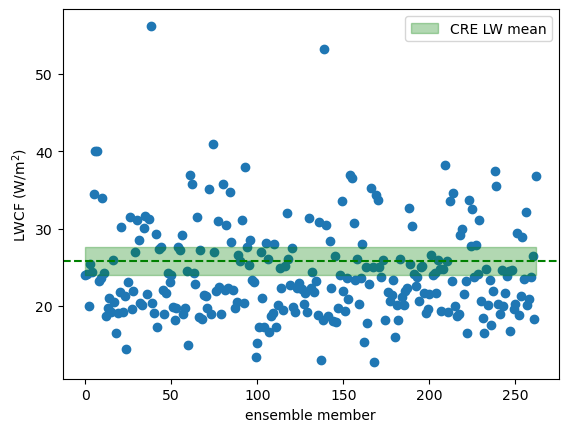

In [70]:
plt.scatter(ensemble_mems, lw_glob_mean)
plt.axhline(cre_lw_mean, linestyle='--', color='green')
plt.fill_between(ensemble_mems, 
                 cre_lw_mean - cre_lw_gap,
                 cre_lw_mean + cre_lw_gap,
                 color = 'green',
                 alpha=0.3,
                label='CRE LW mean')
plt.legend()
plt.ylabel(r'LWCF $(\mathrm{W}/\mathrm{m}^2)$')
plt.xlabel('ensemble member');

In [72]:
lwcf_good_indx = np.where((lw_glob_mean >= cre_lw_mean - cre_lw_gap) &
                 (lw_glob_mean <= cre_lw_mean + cre_lw_gap))

In [73]:
lwcf_good_indx

(array([  0,   1,   3,   4,  11,  16,  29,  43,  44,  48,  54,  55,  59,
         63,  67,  75,  89,  90,  94,  95, 102, 106, 113, 116, 118, 120,
        132, 145, 158, 163, 167, 171, 173, 182, 188, 190, 194, 195, 200,
        202, 204, 205, 207, 209, 227, 232, 241, 245, 247, 259]),)

In [76]:
np.count_nonzero((lw_glob_mean >= cre_lw_mean - cre_lw_gap) &
                 (lw_glob_mean <= cre_lw_mean + cre_lw_gap))

50

In [77]:
cre_sw_gap = np.abs(sw_glob_mean[0] - cre_sw_mean)

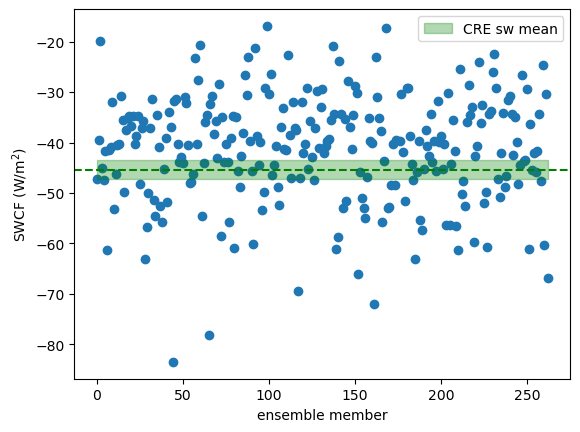

In [78]:
plt.scatter(ensemble_mems, sw_glob_mean)
plt.axhline(cre_sw_mean, linestyle='--', color='green')
plt.fill_between(ensemble_mems, 
                 cre_sw_mean - cre_sw_gap,
                 cre_sw_mean + cre_sw_gap,
                 color = 'green',
                 alpha=0.3,
                label='CRE sw mean')
plt.legend()
plt.ylabel(r'SWCF $(\mathrm{W}/\mathrm{m}^2)$')
plt.xlabel('ensemble member');

In [79]:
swcf_good_indx = np.where((sw_glob_mean >= cre_sw_mean - cre_sw_gap) &
                 (sw_glob_mean <= cre_sw_mean + cre_sw_gap))

In [80]:
swcf_good_indx

(array([  0,   3,  11,  39,  48,  50,  56,  62,  74,  76,  82,  90,  94,
        102, 103, 113, 118, 123, 153, 157, 167, 182, 185, 189, 194, 196,
        200, 205, 232, 237, 245, 247, 252, 254]),)

In [81]:
np.count_nonzero((sw_glob_mean >= cre_sw_mean - cre_sw_gap) &
                 (sw_glob_mean <= cre_sw_mean + cre_sw_gap))

34

In [84]:
lwsw_good_indices = np.intersect1d(swcf_good_indx, lwcf_good_indx)

In [94]:
lwsw_good_indices

array([  0,   3,  11,  48,  90,  94, 102, 113, 118, 167, 182, 194, 200,
       205, 232, 245, 247])

In [89]:
lw_good_lwsw = lw_glob_mean[lwsw_good_indices]
lw_good_sw = lw_glob_mean[swcf_good_indx]
sw_good_lwsw = sw_glob_mean[lwsw_good_indices]
sw_good_lw = sw_glob_mean[lwcf_good_indx]

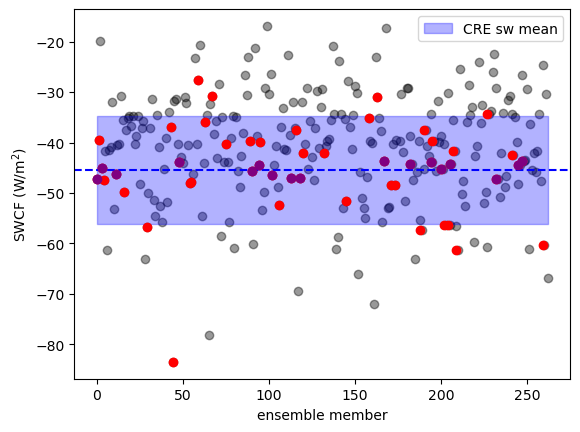

In [180]:
plt.scatter(ensemble_mems, sw_glob_mean, color='k', alpha=0.4)
plt.axhline(cre_sw_mean, linestyle='--', color='blue')
plt.fill_between(ensemble_mems, 
                 cre_sw_mean - sw_sd,
                 cre_sw_mean + sw_sd,
                 color = 'blue',
                 alpha=0.3,
                label='CRE sw mean')
plt.legend()
plt.ylabel(r'SWCF $(\mathrm{W}/\mathrm{m}^2)$')
plt.xlabel('ensemble member')
plt.scatter(lwsw_good_indices, sw_good_lwsw, color='purple', zorder = 2.5)
plt.scatter(lwcf_good_indx, sw_good_lw, color='red', zorder = 1.5)
plt.savefig('SWCF_constraint.png');

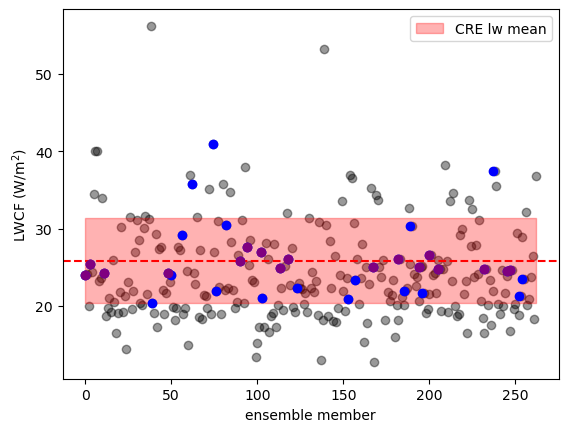

In [158]:
plt.scatter(ensemble_mems, lw_glob_mean, color='k', alpha=0.4)
plt.axhline(cre_lw_mean, linestyle='--', color='red')
plt.fill_between(ensemble_mems, 
                 cre_lw_mean - 3 * cre_lw_gap,
                 cre_lw_mean + 3 * cre_lw_gap,
                 color = 'red',
                 alpha=0.3,
                label='CRE lw mean')
plt.legend()
plt.ylabel(r'LWCF $(\mathrm{W}/\mathrm{m}^2)$')
plt.xlabel('ensemble member')
plt.scatter(lwsw_good_indices, lw_good_lwsw, color='purple', zorder = 2.5)
plt.scatter(swcf_good_indx, lw_good_sw, color='blue', zorder = 1.5)
plt.savefig('LWCF_constraint.png');

(array([0.114213  , 0.08565975, 0.15704287, 0.04282987, 0.04282987,
        0.        , 0.        , 0.01427662, 0.01427662, 0.01427662]),
 array([20.34356788, 22.40370217, 24.46383646, 26.52397076, 28.58410505,
        30.64423934, 32.70437364, 34.76450793, 36.82464222, 38.88477651,
        40.94491081]),
 <BarContainer object of 10 artists>)

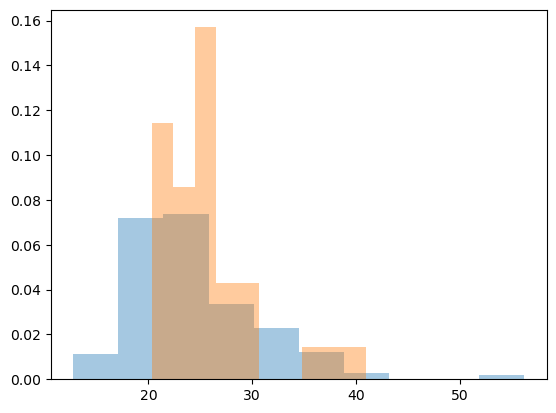

In [108]:
plt.hist(lw_glob_mean, density=True, alpha=0.4);
plt.hist(lw_good_sw, density=True, alpha=0.4)

(array([0.00358144, 0.        , 0.        , 0.00358144, 0.0179072 ,
        0.00716288, 0.06088447, 0.05372159, 0.02148864, 0.01074432]),
 array([-83.52380589, -77.93945924, -72.35511259, -66.77076594,
        -61.18641929, -55.60207264, -50.01772599, -44.43337934,
        -38.84903269, -33.26468605, -27.6803394 ]),
 <BarContainer object of 10 artists>)

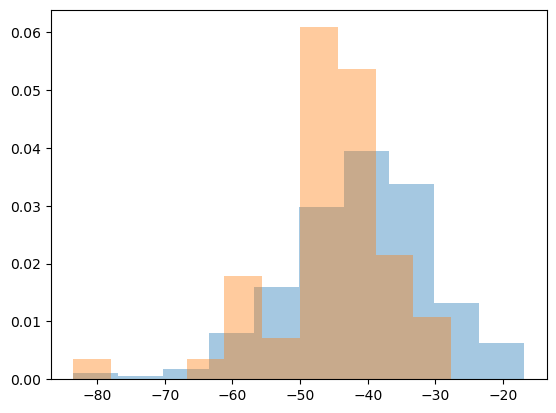

In [109]:
plt.hist(sw_glob_mean, density=True, alpha=0.4);
plt.hist(sw_good_lw, density=True, alpha=0.4)

In [75]:
lw_sd = np.std(lw_glob_mean)
sw_sd = np.std(sw_glob_mean)

In [156]:
cre_lw_gap

1.8357293168401654

In [76]:
lwcf_lindx = np.where((lw_glob_mean >= cre_lw_mean - lw_sd) &
                 (lw_glob_mean <= cre_lw_mean + lw_sd))

swcf_lindx = np.where((sw_glob_mean >= cre_sw_mean - sw_sd) &
                 (sw_glob_mean <= cre_sw_mean + sw_sd))

In [77]:
tmq_sd = np.std(tmq_glob_mean_np)

In [172]:
tmq_glob_mean

<xarray.Dataset> Size: 2kB
Dimensions:  (ensemble: 262)
Dimensions without coordinates: ensemble
Data variables:
    TMQ      (ensemble) float64 2kB 24.82 24.46 25.13 ... 24.95 22.27 26.54

In [78]:
sat_pwv_glob_mean.values

array(24.940191, dtype=float32)

In [79]:
tmq_lindx = np.where((tmq_glob_mean['TMQ'] >= sat_pwv_glob_mean.values - tmq_sd) &
                    (tmq_glob_mean['TMQ'] <= sat_pwv_glob_mean.values + tmq_sd))

In [80]:
prect_sd = np.std(prect_glob_mean.values)

In [81]:
prect_lindx = np.where((prect_glob_mean.values >= glob_mean_pr - prect_sd) &
                       (prect_glob_mean.values <= glob_mean_pr + prect_sd))

In [165]:
np.intersect1d(cre_lw_lindx, cre_sw_lindx)

array([  0,   1,   3,   4,   8,  11,  13,  16,  17,  20,  21,  23,  25,
        26,  30,  31,  33,  34,  36,  37,  39,  41,  43,  47,  48,  49,
        50,  53,  54,  55,  56,  58,  63,  69,  70,  75,  76,  77,  78,
        81,  82,  83,  85,  89,  90,  94,  95,  96,  97, 102, 103, 105,
       106, 110, 112, 113, 116, 118, 120, 121, 123, 124, 125, 126, 127,
       132, 133, 134, 136, 143, 145, 147, 148, 153, 156, 157, 158, 159,
       160, 165, 167, 171, 172, 173, 175, 177, 178, 182, 183, 185, 186,
       189, 190, 191, 192, 194, 195, 196, 199, 200, 201, 205, 207, 212,
       214, 219, 220, 225, 232, 233, 234, 236, 241, 242, 243, 244, 245,
       247, 252, 253, 254, 257])

In [82]:
flut_sd = np.std(cam_flut_avg['FLUT'].values)

In [83]:
flut_lindx = np.where((cam_flut_avg['FLUT'].values >= ceres_OLR_mean - flut_sd) &
                      (cam_flut_avg['FLUT'].values <= ceres_OLR_mean + flut_sd))

In [84]:
ceres_net_toa_mean = ceres_glob_mean_ann['gtoa_net_all_mon'].sel(year=slice('2001', '2010')).values.mean()

In [85]:
cam_fsntoa_avg = xr.open_dataset('cam6_ppe_fsntoa_avg.nc')

In [86]:
net_toa_avg = cam_flut_avg['FLUT'].values - cam_fsntoa_avg['FSNTOA'].values

In [87]:
net_toa_sd = np.std(net_toa_avg)

In [88]:
net_toa_sd

8.988724165242623

In [89]:
net_toa_lindx = np.where((net_toa_avg >= -ceres_net_toa_mean - net_toa_sd) &
                         (net_toa_avg <= -ceres_net_toa_mean + net_toa_sd))

In [90]:
from functools import reduce

constrained_indx = reduce(np.intersect1d,
                          [lwcf_lindx, swcf_lindx, tmq_lindx, prect_lindx, flut_lindx, net_toa_lindx])

In [91]:
np.array(constrained_indx).shape

(54,)

In [93]:
sub_indx2 = constrained_indx

In [109]:
good_flut_dist = (cam_flut_avg['FLUT'].values[sub_indx2] - ceres_OLR_mean) / flut_sd

In [110]:
good_tmq_dist = (tmq_glob_mean['TMQ'].values[sub_indx2] - sat_pwv_glob_mean.values) / tmq_sd

In [111]:
good_prect_dist = (prect_glob_mean.values[sub_indx2] - glob_mean_pr) / prect_sd

In [112]:
good_toa_dist = (net_toa_avg[sub_indx2] - (-ceres_net_toa_mean)) / net_toa_sd

In [113]:
dist_mat2 = np.vstack([good_flut_dist, good_tmq_dist, good_prect_dist, good_toa_dist])

In [114]:
dist_mat2 = np.sqrt(np.sum(dist_mat2**2, axis=0))

In [115]:
dist_mat2[np.argsort(dist_mat2)]

array([0.33396678, 0.45591768, 0.52664102, 0.5625053 , 0.57088004,
       0.5835025 , 0.5844259 , 0.64072168, 0.69585699, 0.72911936,
       0.73582032, 0.74221109, 0.75300698, 0.75433491, 0.77468706,
       0.77963347, 0.82264886, 0.82743144, 0.87996911, 0.88441944,
       0.9013106 , 0.91920622, 0.94690134, 0.95758206, 0.96323675,
       0.99751576, 0.99816034, 1.0078841 , 1.01155178, 1.02963475,
       1.0302773 , 1.03843143, 1.05292248, 1.05361551, 1.05459126,
       1.05533402, 1.11676352, 1.11749824, 1.13863138, 1.16886612,
       1.19241375, 1.19492999, 1.21714171, 1.22060669, 1.22659369,
       1.23238335, 1.24180465, 1.25072366, 1.26153695, 1.30549854,
       1.39038047, 1.48766118, 1.50006067, 1.52857198])

In [116]:
np.argsort(dist_mat2)

array([52, 30, 25, 39, 18, 12,  6,  0, 53, 44, 31, 35, 23, 10, 37,  2, 17,
       42, 11, 46, 14,  1, 29, 21,  5,  4, 28,  7, 13, 43, 22, 24, 19, 26,
       41, 49, 34, 48, 45, 51, 32,  8, 27,  9, 15,  3, 20, 36, 33, 38, 50,
       16, 40, 47])

In [117]:
best_indx = constrained_indx[np.argsort(dist_mat2)][0:10]

In [118]:
best_indx

array([252, 153, 126, 196, 103,  76,  39,   0, 257, 225])

In [119]:
ensemble_mems[best_indx]

array([253, 153, 126, 197, 103,  76,  39,   0, 258, 226])

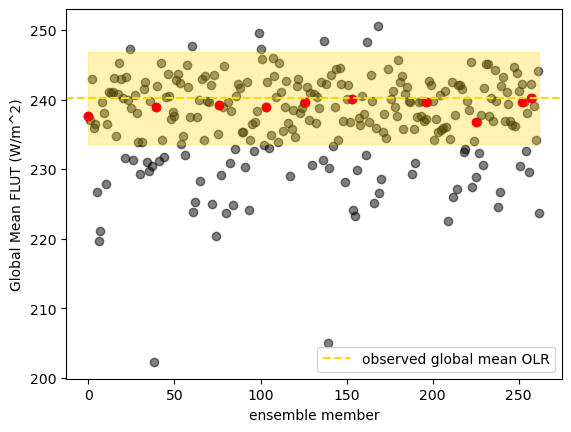

In [339]:
plt.scatter(ensemble_mems, cam_flut_avg['FLUT'].values, color='k', alpha = 0.5)
plt.axhline(ceres_OLR_mean,
            linestyle='--',
            color='gold',
            label='observed global mean OLR')
plt.fill_between(ensemble_mems,
                 ceres_OLR_mean - flut_sd,
                 ceres_OLR_mean + flut_sd,
                 color='gold',
                 alpha = 0.3)
plt.scatter(best_indx, cam_flut_avg['FLUT'].values[best_indx], color='red')
plt.xlabel('ensemble member')
plt.ylabel('Global Mean FLUT (W/m^2)')
plt.legend()
plt.savefig('FLUT_constraint.png');

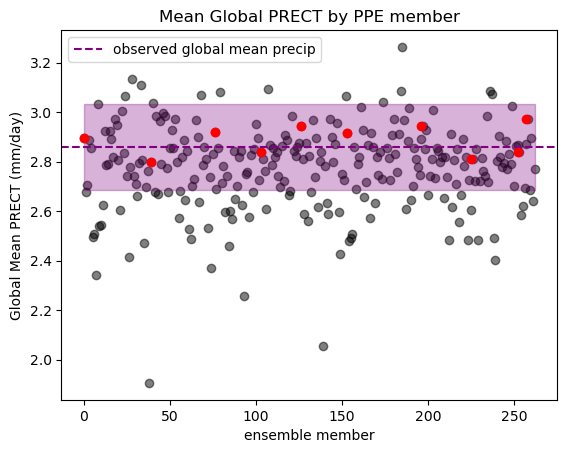

In [333]:
plt.scatter(ensemble_mems, prect_glob_mean.values, color='k', alpha = 0.5)
plt.axhline(glob_mean_pr,
            linestyle='--',
            color='purple',
            label='observed global mean precip')
plt.fill_between(ensemble_mems,
                 glob_mean_pr - prect_sd,
                 glob_mean_pr + prect_sd,
                 color='purple',
                 alpha = 0.3)
plt.scatter(best_indx, prect_glob_mean.values[best_indx], color='red')
plt.xlabel('ensemble member')
plt.ylabel('Global Mean PRECT (mm/day)')
plt.title('Mean Global PRECT by PPE member')
plt.legend()
plt.savefig('PRECT_constraint.png');

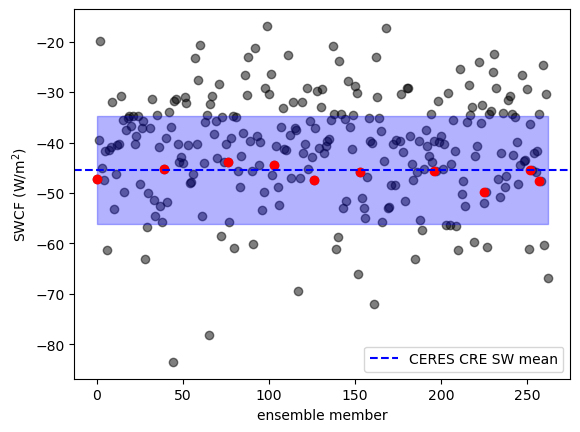

In [334]:
plt.scatter(ensemble_mems, sw_glob_mean, color='k', alpha=0.5)
plt.axhline(cre_sw_mean, linestyle='--', color='blue', label='CERES CRE SW mean')
plt.fill_between(ensemble_mems, 
                 cre_sw_mean - sw_sd,
                 cre_sw_mean + sw_sd,
                 color = 'blue',
                 alpha=0.3)
plt.ylabel(r'SWCF $(\mathrm{W}/\mathrm{m}^2)$')
plt.xlabel('ensemble member')
plt.scatter(best_indx, sw_glob_mean[best_indx], color='red')
plt.legend()
plt.savefig('SWCF_constraint.png');

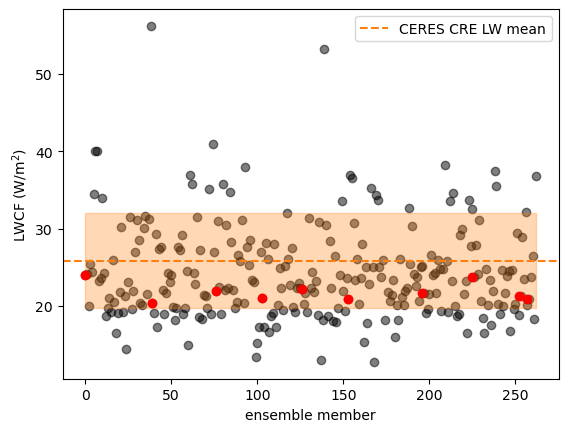

In [335]:
plt.scatter(ensemble_mems, lw_glob_mean, color='k', alpha=0.5)
plt.axhline(cre_lw_mean, linestyle='--', color='tab:orange', label='CERES CRE LW mean')
plt.fill_between(ensemble_mems, 
                 cre_lw_mean - lw_sd,
                 cre_lw_mean + lw_sd,
                 color = 'tab:orange',
                 alpha=0.3)
plt.legend()
plt.ylabel(r'LWCF $(\mathrm{W}/\mathrm{m}^2)$')
plt.xlabel('ensemble member')
plt.scatter(best_indx, lw_glob_mean[best_indx], color='red')
plt.savefig('LWCF_constraint.png');

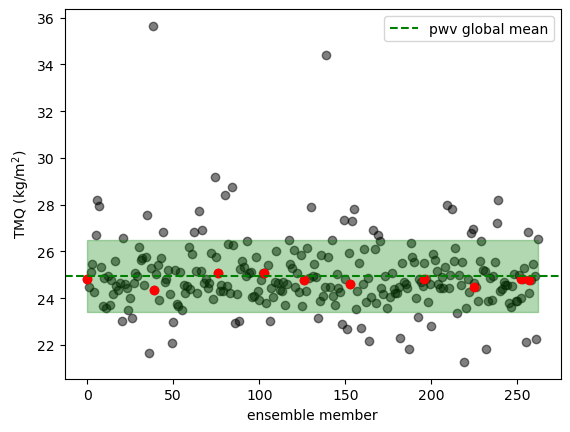

In [336]:
plt.scatter(ensemble_mems, tmq_glob_mean_np, color='k', alpha=0.5)
plt.axhline(sat_pwv_glob_mean,
            linestyle='--',
            color='green',
            zorder=2.5,
           label='pwv global mean')
plt.fill_between(ensemble_mems,
                 sat_pwv_glob_mean - tmq_sd,
                 sat_pwv_glob_mean + tmq_sd,
                 color='green',
                 alpha=0.3)
plt.scatter(best_indx, tmq_glob_mean_np[best_indx], color='red')
plt.xlabel('ensemble member')
plt.ylabel(r'TMQ $(\mathrm{kg}/\mathrm{m}^2)$')
plt.legend()
plt.savefig('TMQ_constraint.png');

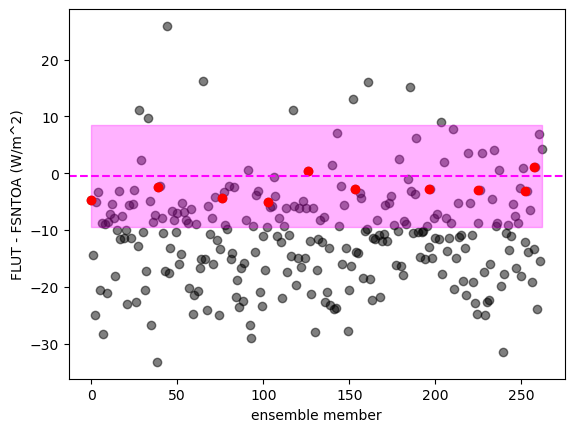

In [338]:
plt.scatter(ensemble_mems, net_toa_avg, color='k', alpha=0.5)
plt.axhline(-ceres_net_toa_mean, linestyle='--', color='magenta')
plt.fill_between(ensemble_mems, -ceres_net_toa_mean - net_toa_sd,
                -ceres_net_toa_mean + net_toa_sd,
                alpha = 0.3,
                color = 'magenta')
plt.scatter(best_indx, net_toa_avg[best_indx], color='red')
plt.ylabel('FLUT - FSNTOA (W/m^2)')
plt.xlabel('ensemble member')
plt.savefig('netflux_constraint.png');

In [6]:
lat_bins = np.arange(-90, 91, 20)

In [9]:
sat_data['pr']

<xarray.DataArray 'pr' (lat: 90, lon: 144)> Size: 52kB
[12960 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 576B -178.8 -176.2 -173.8 ... 173.8 176.2 178.8
Attributes:
    long_name:  Surface Precipitation Rate from Obs4MIPS archive (Blend of GP...
    units:      mm/day